In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import layers, models, regularizers
import cv2
import matplotlib.pyplot as plt
import numpy as np


## Loading and processing dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # normalize pixels

In [3]:
train_images = tf.image.resize(train_images, [32, 32]).numpy()
test_images = tf.image.resize(test_images, [32, 32]).numpy()

In [4]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

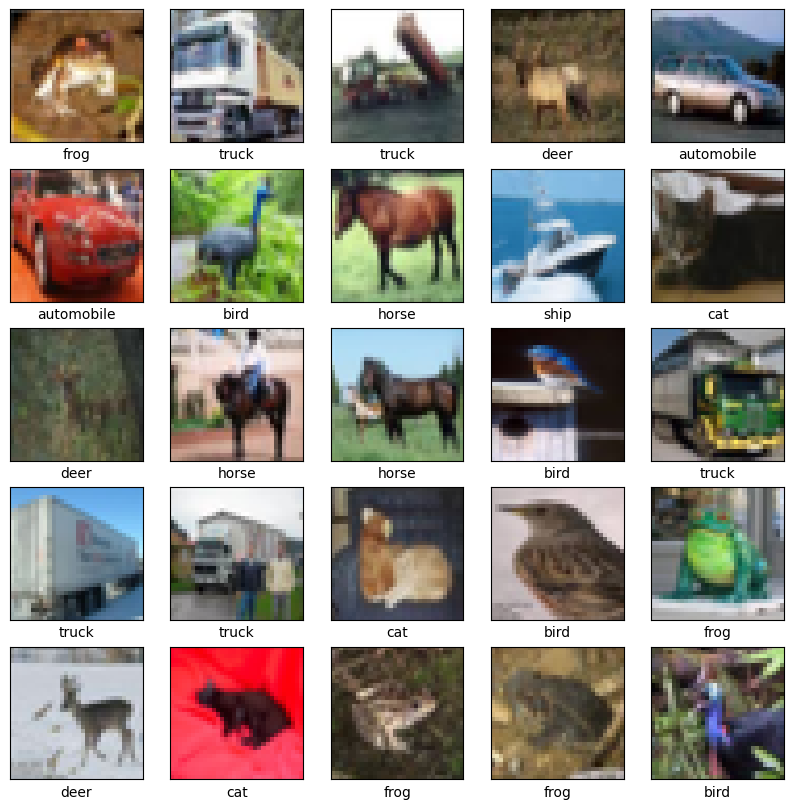

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Creating model

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Training

In [26]:
# batch = 16
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
# train_dataset = train_dataset.batch(batch)
# test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
# test_dataset = test_dataset.batch(batch)

train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [8]:
epochs = 10
history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3735 - loss: 1.7156 - val_accuracy: 0.5560 - val_loss: 1.2289
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5836 - loss: 1.1779 - val_accuracy: 0.6237 - val_loss: 1.0728
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6455 - loss: 1.0013 - val_accuracy: 0.6550 - val_loss: 0.9767
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6903 - loss: 0.8833 - val_accuracy: 0.6912 - val_loss: 0.8884
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7192 - loss: 0.8017 - val_accuracy: 0.6750 - val_loss: 0.9158
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7412 - loss: 0.7390 - val_accuracy: 0.6985 - val_loss: 0.8852
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7595 - loss: 0.6822 - val_accuracy: 0.7086 - val_loss: 0.8422
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7805 - loss: 0.6259 

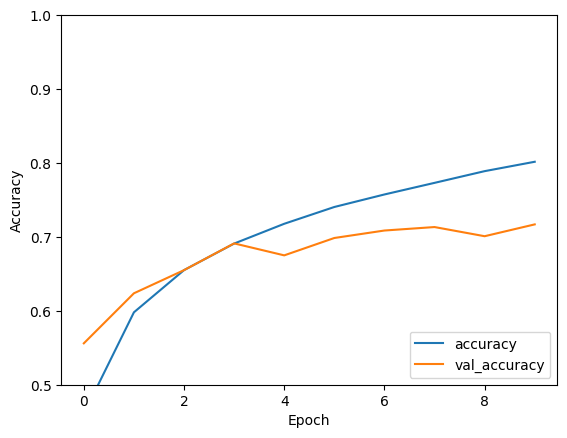

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Acurácia sobre os dados de teste: {round(test_acc,2)*100}%')

313/313 - 1s - 2ms/step - accuracy: 0.7169 - loss: 0.9107
Acurácia sobre os dados de teste: 72.0%


In [16]:
model.save_weights('SimpleImageClassifier.weights.h5')

## Transfer Learning with same Model

In [17]:
from tensorflow.keras.applications import VGG16


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False


vgg16 = models.Sequential()
vgg16.add(base_model)
vgg16.add(layers.Flatten())
vgg16.add(layers.Dense(256, activation='relu'))
vgg16.add(layers.Dropout(0.5))
vgg16.add(layers.Dense(10, activation='softmax'))

vgg16.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = vgg16.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.2570 - loss: 2.0758 - val_accuracy: 0.4833 - val_loss: 1.5271
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.4633 - loss: 1.5499 - val_accuracy: 0.5189 - val_loss: 1.4004
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.5014 - loss: 1.4343 - val_accuracy: 0.5377 - val_loss: 1.3420
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5189 - loss: 1.3794 - val_accuracy: 0.5476 - val_loss: 1.2984
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.5359 - loss: 1.3294 - val_accuracy: 0.5563 - val_loss: 1.2720
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5495 - loss: 1.3013 - val_accuracy: 0.5628 - val_loss: 1.2499
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5560 - loss: 1.2749 - val_accuracy: 0.5720 - val_loss: 1.2338
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.5624 - loss: 1.2587 - va

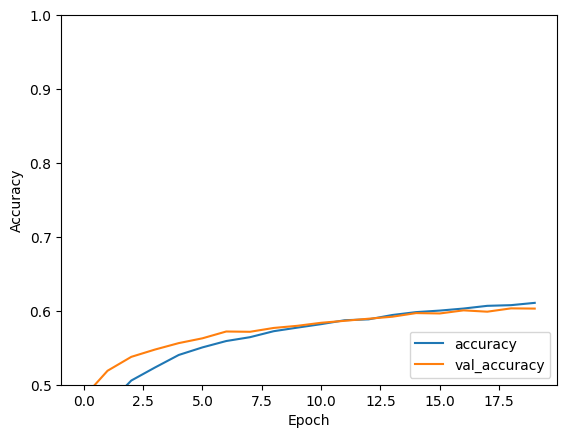

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [22]:
test_loss, test_acc = vgg16.evaluate(test_images,  test_labels, verbose=2)
print(f'Acurácia sobre os dados de teste: {round(test_acc,2)*100}%')

313/313 - 2s - 6ms/step - accuracy: 0.6030 - loss: 1.1364
Acurácia sobre os dados de teste: 60.0%


## True inference

In [36]:
from tensorflow.keras.preprocessing import image


!wget -q -O image.png https://www.theinsuranceemporium.co.uk/blog/wp-content/uploads/2023/09/image-10.png

def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(32, 32))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    probabilities = tf.nn.softmax(predictions[0]).numpy()
    predicted_class = np.argmax(probabilities)
    return predicted_class, round(probabilities[predicted_class]*100,2)

predicted_class, score= predict_image('image.png', model)
print(f'A imagem foi classificada (raw vgg16) como: {class_names[predicted_class]} com Score: {score}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
A imagem foi classificada (raw vgg16) como: horse com Score: 99.33%


In [37]:
predicted_class, score= predict_image('image.png', vgg16)
print(f'A imagem foi classificada (pre-trained) como: {class_names[predicted_class]} com Score: {score}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
A imagem foi classificada (pre-trained) como: horse com Score: 17.73%


## Conclusão:

- Usar um modelo pré-treinado é bom, pode ser útil, porém nesse caso demonstrou que para convergir deve-se treinar por mais tempo
- Em compensação usar uma rede mais simples nesse caso se mostrou mais eficiente a curto prazo